# Difference Method for a Hyperbolic Equation

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
N = 18
M = 18

T = math.pi
L = math.pi

delta_x = T / M
delta_t = L / N

gamma = delta_t**2 / delta_x**2

In [3]:
mu1 = lambda x : 0
mu2 = lambda x : 0
u0 = lambda x : x * (math.pi - x)
v0 = lambda x : 0

In [4]:
web = np.zeros((M + 1, N + 1))
x = np.linspace(0, L, num = N + 1)

for m in range(0, M):
    web[m, 0] = mu1(x[m])
    web[m, N] = mu2(x[m])

for n in range(1, N):
    web[0,n] = u0(x[n])

for n in range(1, N):
    web[1, n] = u0(x[n]) + delta_t * v0(x[n]) + delta_t**2 * (u0(x[n - 1]) - 2*u0(x[n]) + u0(x[n + 1])) / (2*delta_x**2) 

for n in range(1, N):
    for m in range(1, M):
        web[n + 1, m] = 2 * web[n, m] - web[n - 1, m] + gamma * (web[n, m + 1] - 2 * web[n, m] + web[n, m - 1])

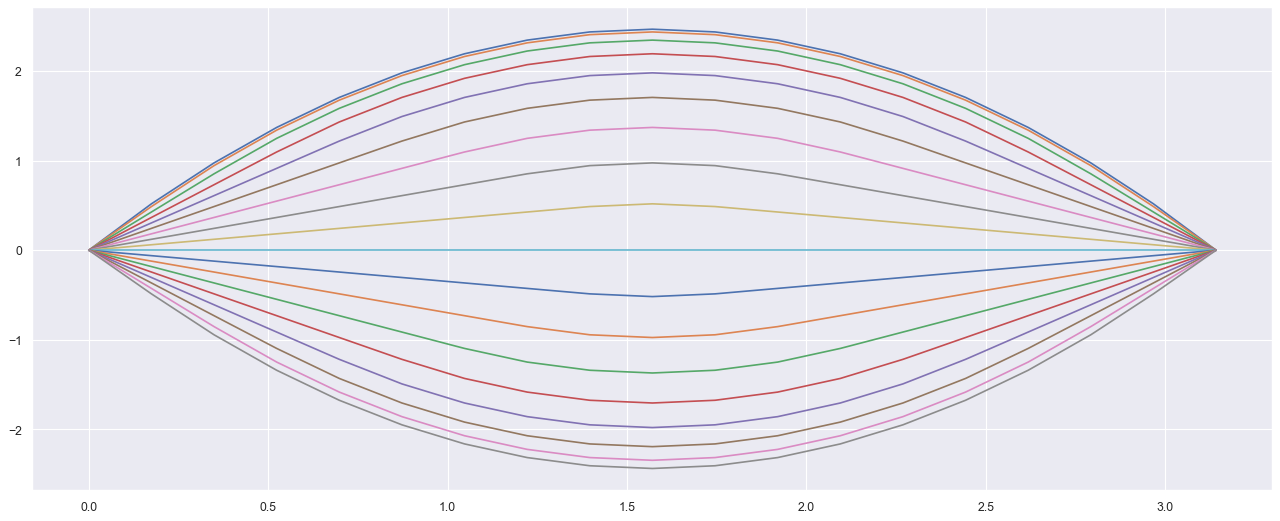

In [5]:
camera = Camera(plt.figure(figsize = (20,8), dpi = 80))

for i in range(N):
    plt.plot(x, web[i])
    camera.snap()

In [6]:
camera.animate(interval = 200, repeat = True, repeat_delay = 500)